In [1]:
from sagemaker.pytorch.model import PyTorchModel 

In [2]:
from sagemaker import get_execution_role

In [3]:
role = get_execution_role()

pytorch_model = PyTorchModel(model_data='s3://sagemaker-us-east-2-808810818304/model/HPmodel.tar.gz', role=role,
                             framework_version='1.6.0',
                             py_version='py3',
                             entry_point='inference.py')



In [4]:
predictor = pytorch_model.deploy(instance_type='ml.m4.xlarge',
                                     initial_instance_count=1,
                                     accelerator_type='ml.eia1.large')

Defaulting to the only supported framework/algorithm version: 1.3.1. Ignoring framework/algorithm version: 1.6.0.


---------------------------!

In [5]:
!sudo yum install python36-devel -y

Loaded plugins: dkms-build-requires, priorities, update-motd, upgrade-helper,
              : versionlock
amzn-main                                                | 2.1 kB     00:00     
amzn-updates                                             | 3.8 kB     00:00     
Resolving Dependencies
--> Running transaction check
---> Package python36-devel.x86_64 0:3.6.12-1.19.amzn1 will be installed
--> Finished Dependency Resolution

Dependencies Resolved

 Package             Arch        Version                Repository         Size
Installing:
 python36-devel      x86_64      3.6.12-1.19.amzn1      amzn-updates      1.2 M

Transaction Summary
Install  1 Package

Total download size: 1.2 M
Installed size: 2.6 M
python36-devel-3.6.12-1.19.amzn1.x86_64.rpm                | 1.2 MB   00:00     
Running transaction check
Running transaction test
Transaction test succeeded
Running transaction
  Installing : python36-devel-3.6.12-1.19.amzn1.x86_64                      1/1 
  Verifying  : python36-d

In [6]:
!pip install  --install-option="--no" --install-option="DLIB_USE_CUDA" dlib

/home/ec2-user/anaconda3/envs/pytorch_latest_p36/lib/python3.6/site-packages/pip/_internal/commands/install.py:232: UserWarning: Disabling all use of wheels due to the use of --build-option / --global-option / --install-option.
  cmdoptions.check_install_build_global(options)
     |████████████████████████████████| 3.6 MB 6.4 MB/s eta 0:00:01
Skipping wheel build for dlib, due to binaries being disabled for it.
    Running setup.py install for dlib ... done
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/pytorch_latest_p36/bin/python -m pip install --upgrade pip' command.


In [7]:
import dlib

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
import cv2
detector = dlib.get_frontal_face_detector()


In [71]:
frame = cv2.imread('IMG-7325.JPG')
cv2_frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
faces = detector(gray, 1) # result
#to draw faces on image
for result in faces:
    x_min = result.left()
    y_min = result.top()
    x_max = result.right()
    y_max = result.bottom()

    

In [73]:
bbox_width = abs(x_max - x_min)
bbox_height = abs(y_max - y_min)
x_min -= 2 * bbox_width / 4
x_max += 2 * bbox_width / 4
y_min -= 3 * bbox_height / 4
y_max += bbox_height / 4
x_min = max(x_min, 0)
y_min = max(y_min, 0)
x_max = min(frame.shape[1], x_max)
y_max = min(frame.shape[0], y_max)
# Crop image

In [74]:
x_min , x_max , y_min , y_max = int(x_min) , int(x_max) , int(y_min) , int(y_max)  
img = cv2_frame[y_min:y_max,x_min:x_max]

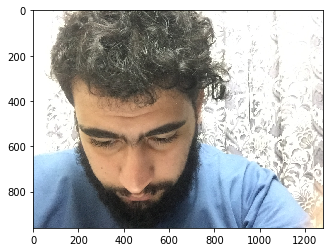

In [75]:
plt.imshow(img)

In [6]:
import cv2
frame = cv2.imread('Photo on 05-01-2021 at 6.42 AM #4.jpg')

pr = predictor.predict(frame)

In [10]:
pitch_predicted,yaw_predicted,_ = pr

In [13]:
pitch_predicted, yaw_predicted

(-13.425659, 47.615204)

In [109]:
frame = cv2.imread('IMG-7325.JPG')

In [110]:
input_data = torch.from_numpy(frame)

In [112]:
input_data = input_data.numpy()

cv2_frame = cv2.cvtColor(input_data,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(input_data, cv2.COLOR_BGR2GRAY)
faces = detector(gray, 1) # result

#to draw faces on image
for result in faces:
    x_min = result.left()
    y_min = result.top()
    x_max = result.right()
    y_max = result.bottom()
    
bbox_width = abs(x_max - x_min)
bbox_height = abs(y_max - y_min)
x_min -= 2 * bbox_width / 4
x_max += 2 * bbox_width / 4
y_min -= 3 * bbox_height / 4
y_max += bbox_height / 4
x_min = max(x_min, 0)
y_min = max(y_min, 0)
x_max = min(input_data.shape[1], x_max)
y_max = min(input_data.shape[0], y_max)

x_min , x_max , y_min , y_max = int(x_min) , int(x_max) , int(y_min) , int(y_max)  
input_data = cv2_frame[y_min:y_max,x_min:x_max]




In [113]:
input_data

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[121, 150, 190],
        [116, 145, 185],
        [113, 143, 181],
        ...,
        [246, 234, 194],
        [249, 237, 197],
        [251, 239, 199]],

       [[118, 147, 187],
        [113, 142, 182],
        [110, 140, 178],
        ...,
        [247, 235, 195],
        [250, 238, 198],
        [253, 241, 201]],

       [[114, 143, 183],
        [109, 138, 178],
        [108, 138, 176],
        ...,
        [249, 237, 197],
        [252, 240, 200],
        [255, 243, 203]]

In [39]:
os.mkdir('mnt/acess/stud_1')

In [44]:
os.listdir(os.getcwd())

['IMG-7323.JPG',
 'Photo on 05-01-2021 at 6.43 AM.jpg',
 'mnt',
 'IMG-7326.JPG',
 '.ipynb_checkpoints',
 'IMG-7327.JPG',
 'IMG-7322.JPG',
 'Photo on 05-01-2021 at 6.42 AM #3.jpg',
 'Photo on 05-01-2021 at 6.42 AM #6.jpg',
 'Photo on 05-01-2021 at 6.42 AM #8.jpg',
 'IMG-7324.JPG',
 'Photo on 05-01-2021 at 6.42 AM #4.jpg',
 'lost+found',
 'Photo on 05-01-2021 at 6.42 AM #2.jpg',
 'IMG-7325.JPG',
 '.sparkmagic',
 'Untitled.ipynb',
 'IMG-7321.JPG',
 'Photo on 05-01-2021 at 6.41 AM.jpg',
 'Photo on 05-01-2021 at 6.42 AM #9.jpg',
 'Photo on 05-01-2021 at 6.42 AM #7.jpg',
 'code',
 'untitled.txt']

In [45]:
os.walk(os.getcwd())

<generator object walk at 0x7fa9a978b410>

In [47]:

directory_list = list()
for root, dirs, files in os.walk(os.getcwd(), topdown=False):
    for name in dirs:
        directory_list.append(os.path.join(root, name))

print(directory_list)

['/home/ec2-user/SageMaker/mnt/acess/student_1', '/home/ec2-user/SageMaker/mnt/acess/.ipynb_checkpoints', '/home/ec2-user/SageMaker/mnt/.ipynb_checkpoints', '/home/ec2-user/SageMaker/mnt/acess', '/home/ec2-user/SageMaker/code/.ipynb_checkpoints', '/home/ec2-user/SageMaker/mnt', '/home/ec2-user/SageMaker/.ipynb_checkpoints', '/home/ec2-user/SageMaker/lost+found', '/home/ec2-user/SageMaker/.sparkmagic', '/home/ec2-user/SageMaker/code']


In [49]:
imgs = [img for img in os.listdir('student1') if img.contains]

['IMG-7323.JPG',
 '.ipynb_checkpoints',
 'IMG-7322.JPG',
 'IMG-7324.JPG',
 'IMG-7325.JPG',
 'IMG-7321.JPG']

In [59]:
dirr =['/student1']


In [62]:
for direct in dirr : 
    images = os.listdir(os.getcwd()+direct)

In [63]:
images

['IMG-7323.JPG',
 '.ipynb_checkpoints',
 'IMG-7322.JPG',
 'IMG-7324.JPG',
 'IMG-7325.JPG',
 'IMG-7321.JPG']

In [53]:
def transfer_to_directions(yaw , pitch ) :
    dir_yaw = '' 
    dir_pitch = '' 
    if -15 < yaw < 15 : 
        dir_yaw = 'center'
    elif yaw < -15 : 
        dir_yaw = 'right'
    elif yaw > 15 : 
        dir_yaw = 'left'
    if -15 < pitch < 15 : 
        dir_pitch = 'center'
    elif pitch < -15 : 
        dir_pitch = 'down'
    elif pitch > 15 : 
        dir_pitch = 'up'
    return dir_yaw , dir_pitch 




In [59]:
import cv2
frame = cv2.imread('test_phs/Photo on 05-01-2021 at 6.42 AM #3.jpg')

pitch , yaw, _ = predictor.predict(frame)
print(yaw , pitch )
yaw , pitch = transfer_to_directions(yaw , pitch )
print(yaw , pitch )

25.357376 -10.395927
left center


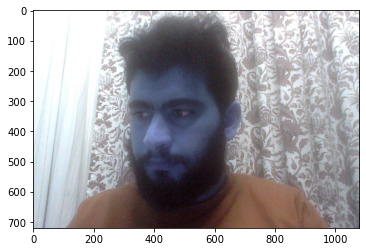

In [60]:
plt.imshow(frame)

In [61]:
import cv2
frame = cv2.imread('test_phs/Photo on 05-01-2021 at 6.42 AM #4.jpg')

pitch , yaw, _ = predictor.predict(frame)
print(yaw , pitch )
yaw , pitch = transfer_to_directions(yaw , pitch )
print(yaw , pitch )

47.615204 -13.425659
left center


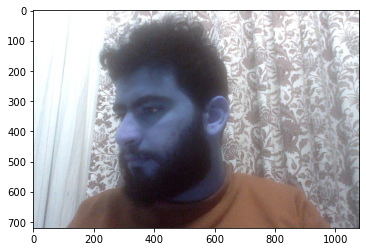

In [62]:
plt.imshow(frame)

In [63]:
import cv2
frame = cv2.imread('test_phs/Photo on 05-01-2021 at 6.42 AM #7.jpg')

pitch , yaw, _ = predictor.predict(frame)
print(yaw , pitch )
yaw , pitch = transfer_to_directions(yaw , pitch )
print(yaw , pitch )

-40.535374 -6.090973
right center


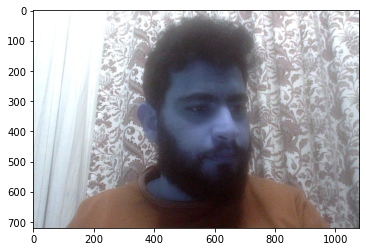

In [64]:
plt.imshow(frame)

In [65]:
import cv2
frame = cv2.imread('test_phs/Photo on 05-01-2021 at 6.42 AM #8.jpg')

pitch , yaw, _ = predictor.predict(frame)
print(yaw , pitch )
yaw , pitch = transfer_to_directions(yaw , pitch )
print(yaw , pitch )

-28.776688 -11.624794
right center


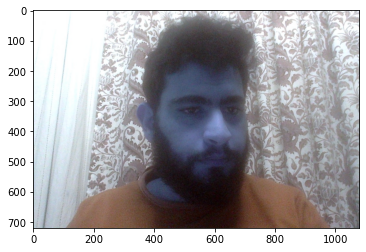

In [66]:
plt.imshow(frame)

In [67]:
import cv2
frame = cv2.imread('test_phs/test_2.jpeg')

pitch , yaw, _ = predictor.predict(frame)
print(yaw , pitch )
yaw , pitch = transfer_to_directions(yaw , pitch )
print(yaw , pitch )

2.3404236 28.038734
center up


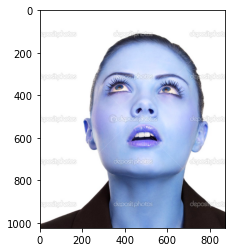

In [68]:
plt.imshow(frame)

In [69]:
import cv2
frame = cv2.imread('test_phs/test_3.jpeg')

pitch , yaw, _ = predictor.predict(frame)
print(yaw , pitch )
yaw , pitch = transfer_to_directions(yaw , pitch )
print(yaw , pitch )

-1.1985168 -28.365608
center down


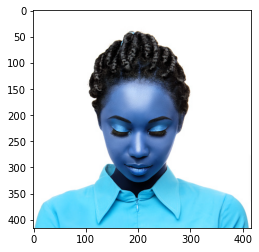

In [70]:
plt.imshow(frame)